In [104]:
import pandas as pd
import plotly.express as px
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

In [107]:
data = pd.read_csv('/content/sensorc.csv')
data

,Unnamed: 0,id,long,lat,indoor,P0,P1,P2,counts_per_minute,humidity,noise_LA_max,noise_LA_min,noise_LAeq,pressure,pressure_at_sealevel,temperature
0,0,20232739719,37.710000,55.652000,0,NaN,6.20,2.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,20232739748,37.864000,55.630000,0,NaN,2.63,1.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,20232739799,37.928000,59.082000,0,NaN,1.20,0.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,20232739831,73.504000,54.918000,0,NaN,NaN,NaN,NaN,51.39,NaN,NaN,NaN,99823.69,101196.09,19.65
4,4,20232739938,37.734735,55.601946,0,NaN,4.00,2.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,1436,20232789880,37.894000,59.134000,0,NaN,8.38,2.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1437,1437,20232789886,38.516951,54.853616,0,NaN,NaN,NaN,NaN,100.00,NaN,NaN,NaN,-23370.19,-23720.27,3.74
1438,1438,20232789893,37.934000,59.144000,0,NaN,9.73,5.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1439,1439,20232789894,37.460000,55.698000,0,NaN,NaN,NaN,NaN,32.28,NaN,NaN,NaN,100633.69,102479.76,18.91


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1441 non-null   int64  
 1   id                    1441 non-null   int64  
 2   long                  1441 non-null   float64
 3   lat                   1441 non-null   float64
 4   indoor                1441 non-null   int64  
 5   P0                    76 non-null     float64
 6   P1                    810 non-null    float64
 7   P2                    810 non-null    float64
 8   counts_per_minute     2 non-null      float64
 9   humidity              554 non-null    float64
 10  noise_LA_max          51 non-null     float64
 11  noise_LA_min          51 non-null     float64
 12  noise_LAeq            51 non-null     float64
 13  pressure              518 non-null    float64
 14  pressure_at_sealevel  515 non-null    float64
 15  temperature          

In [109]:
data = data.drop(columns=['P0', 'counts_per_minute'])

In [110]:
datchik = []

for i in ['P1', 'P2', 'humidity', 'noise_LA_max', 'noise_LA_min', 'noise_LAeq', 'pressure', 'pressure_at_sealevel']:
  datchik.append(data[[i, 'long', 'lat']].dropna())

In [111]:
fig = px.scatter(datchik[2], x="long", y="lat", color="humidity")
fig.show()

In [112]:
data = data.groupby(['long', 'lat'], as_index=False).mean()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   long                  366 non-null    float64
 1   lat                   366 non-null    float64
 2   Unnamed: 0            366 non-null    float64
 3   id                    366 non-null    float64
 4   indoor                366 non-null    float64
 5   P1                    346 non-null    float64
 6   P2                    346 non-null    float64
 7   humidity              241 non-null    float64
 8   noise_LA_max          13 non-null     float64
 9   noise_LA_min          13 non-null     float64
 10  noise_LAeq            13 non-null     float64
 11  pressure              220 non-null    float64
 12  pressure_at_sealevel  219 non-null    float64
 13  temperature           249 non-null    float64
dtypes: float64(14)
memory usage: 40.2 KB


In [113]:
data.fillna(data.mean(), inplace = True)

In [114]:
targets = pd.read_csv('targets.csv')

In [115]:
data = data.merge(targets, on=['long', 'lat'])
data

,long,lat,Unnamed: 0_x,id,indoor,P1,P2,humidity,noise_LA_max,noise_LA_min,noise_LAeq,pressure,pressure_at_sealevel,temperature,Unnamed: 0_y,Y
0,30.112726,59.787941,876.500000,2.023277e+10,0.0,10.600000,6.000000,41.385000,67.295444,49.733692,56.928453,102090.860000,102524.100000,19.535000,0,0.0
1,30.124885,59.282262,716.000000,2.023276e+10,0.0,2.323333,1.083333,45.664101,67.295444,49.733692,56.928453,95503.111292,97198.759443,12.136825,1,0.0
2,30.137771,59.569931,302.000000,2.023275e+10,0.0,3.750000,2.330000,30.020000,67.295444,49.733692,56.928453,101488.250000,102606.420000,18.635000,2,1.0
3,30.167147,50.541236,912.750000,2.023277e+10,0.0,2.400000,1.950000,33.865000,67.295444,49.733692,56.928453,100731.485000,102635.985000,20.300000,3,1.0
4,30.167612,59.826059,689.250000,2.023276e+10,0.0,4.510000,2.625000,47.415000,67.295444,49.733692,56.928453,102264.295000,102462.220000,14.750000,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,73.460000,55.006000,614.250000,2.023276e+10,0.0,70.715000,4.500000,61.565000,67.295444,49.733692,56.928453,100066.985000,101163.805000,20.455000,361,0.0
362,73.462000,55.034000,806.500000,2.023277e+10,0.0,7.000000,6.500000,45.664101,67.295444,49.733692,56.928453,95503.111292,97198.759443,12.136825,362,0.0
363,73.462700,54.960600,447.500000,2.023276e+10,0.0,3.250000,2.250000,45.664101,67.295444,49.733692,56.928453,95503.111292,97198.759443,12.136825,363,0.0
364,73.496000,54.926000,484.500000,2.023276e+10,0.0,5.625000,2.615000,45.664101,67.295444,49.733692,56.928453,95503.111292,97198.759443,12.136825,364,0.0


In [116]:
fig = px.scatter(data, x="long", y="lat", color="Y")
fig.show()

In [117]:
data = data.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'])
data

,long,lat,id,indoor,P1,P2,humidity,noise_LA_max,noise_LA_min,noise_LAeq,pressure,pressure_at_sealevel,temperature,Y
0,30.112726,59.787941,2.023277e+10,0.0,10.600000,6.000000,41.385000,67.295444,49.733692,56.928453,102090.860000,102524.100000,19.535000,0.0
1,30.124885,59.282262,2.023276e+10,0.0,2.323333,1.083333,45.664101,67.295444,49.733692,56.928453,95503.111292,97198.759443,12.136825,0.0
2,30.137771,59.569931,2.023275e+10,0.0,3.750000,2.330000,30.020000,67.295444,49.733692,56.928453,101488.250000,102606.420000,18.635000,1.0
3,30.167147,50.541236,2.023277e+10,0.0,2.400000,1.950000,33.865000,67.295444,49.733692,56.928453,100731.485000,102635.985000,20.300000,1.0
4,30.167612,59.826059,2.023276e+10,0.0,4.510000,2.625000,47.415000,67.295444,49.733692,56.928453,102264.295000,102462.220000,14.750000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,73.460000,55.006000,2.023276e+10,0.0,70.715000,4.500000,61.565000,67.295444,49.733692,56.928453,100066.985000,101163.805000,20.455000,0.0
362,73.462000,55.034000,2.023277e+10,0.0,7.000000,6.500000,45.664101,67.295444,49.733692,56.928453,95503.111292,97198.759443,12.136825,0.0
363,73.462700,54.960600,2.023276e+10,0.0,3.250000,2.250000,45.664101,67.295444,49.733692,56.928453,95503.111292,97198.759443,12.136825,0.0
364,73.496000,54.926000,2.023276e+10,0.0,5.625000,2.615000,45.664101,67.295444,49.733692,56.928453,95503.111292,97198.759443,12.136825,0.0


In [118]:
data = data.drop(columns=['long',	'lat',	'id'])
data

,indoor,P1,P2,humidity,noise_LA_max,noise_LA_min,noise_LAeq,pressure,pressure_at_sealevel,temperature,Y
0,0.0,10.600000,6.000000,41.385000,67.295444,49.733692,56.928453,102090.860000,102524.100000,19.535000,0.0
1,0.0,2.323333,1.083333,45.664101,67.295444,49.733692,56.928453,95503.111292,97198.759443,12.136825,0.0
2,0.0,3.750000,2.330000,30.020000,67.295444,49.733692,56.928453,101488.250000,102606.420000,18.635000,1.0
3,0.0,2.400000,1.950000,33.865000,67.295444,49.733692,56.928453,100731.485000,102635.985000,20.300000,1.0
4,0.0,4.510000,2.625000,47.415000,67.295444,49.733692,56.928453,102264.295000,102462.220000,14.750000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
361,0.0,70.715000,4.500000,61.565000,67.295444,49.733692,56.928453,100066.985000,101163.805000,20.455000,0.0
362,0.0,7.000000,6.500000,45.664101,67.295444,49.733692,56.928453,95503.111292,97198.759443,12.136825,0.0
363,0.0,3.250000,2.250000,45.664101,67.295444,49.733692,56.928453,95503.111292,97198.759443,12.136825,0.0
364,0.0,5.625000,2.615000,45.664101,67.295444,49.733692,56.928453,95503.111292,97198.759443,12.136825,0.0


<Axes: >

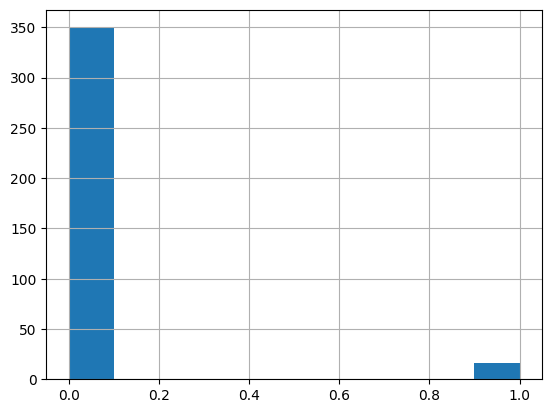

In [119]:
data['Y'].hist()

In [125]:
X_train, X_val, y_train, y_val = train_test_split(data.drop(columns='Y'), data['Y'],
                                                  test_size=0.1, random_state=13, stratify=data['Y'])

In [126]:
clf = CatBoostClassifier(
    iterations=20,
    learning_rate=0.1,
    loss_function='CrossEntropy'
)


clf.fit(X_train, y_train,
        eval_set=(X_val, y_val)
)

0:	learn: 0.6233526	test: 0.6247885	best: 0.6247885 (0)	total: 3.58ms	remaining: 68ms
1:	learn: 0.5788513	test: 0.5825780	best: 0.5825780 (1)	total: 5.92ms	remaining: 53.2ms
2:	learn: 0.5345379	test: 0.5393995	best: 0.5393995 (2)	total: 8.04ms	remaining: 45.6ms
3:	learn: 0.4881975	test: 0.4955527	best: 0.4955527 (3)	total: 10.4ms	remaining: 41.8ms
4:	learn: 0.4547993	test: 0.4636021	best: 0.4636021 (4)	total: 11.9ms	remaining: 35.7ms
5:	learn: 0.4230935	test: 0.4330385	best: 0.4330385 (5)	total: 13.2ms	remaining: 30.8ms
6:	learn: 0.3957561	test: 0.4075776	best: 0.4075776 (6)	total: 14.6ms	remaining: 27.1ms
7:	learn: 0.3705396	test: 0.3860371	best: 0.3860371 (7)	total: 16ms	remaining: 23.9ms
8:	learn: 0.3490929	test: 0.3660150	best: 0.3660150 (8)	total: 17.4ms	remaining: 21.2ms
9:	learn: 0.3314441	test: 0.3490358	best: 0.3490358 (9)	total: 18.8ms	remaining: 18.8ms
10:	learn: 0.3158096	test: 0.3342085	best: 0.3342085 (10)	total: 20.2ms	remaining: 16.5ms
11:	learn: 0.3020991	test: 0.32104

In [128]:
y_pred = clf.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)
# printing metrics
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.9459459459459459
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        35
         1.0       0.00      0.00      0.00         2

    accuracy                           0.95        37
   macro avg       0.47      0.50      0.49        37
weighted avg       0.89      0.95      0.92        37



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

